# Craft Beer - Exploratory Data Analysis

Walkthrough of craft beer dataset analysis from: https://www.kaggle.com/thomascrough/exploring-craft-brewery-data

With added code from me.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Pull in data from csv


Merge both beer and breweries csv on "brewery_id"

In [6]:
df_beer = pd.read_csv('/Users/abeygailpanganiban/craft_beer_fun/craft_beer_analysis/craft_beer_datasets/beers.csv')
df_brew = pd.read_csv('/Users/abeygailpanganiban/craft_beer_fun/craft_beer_analysis/craft_beer_datasets/breweries.csv')

df_brew['brewery_id'] = df_brew.index

df = df_beer.merge(df_brew, on="brewery_id")
df.head()


,Unnamed: 0_x,abv,ibu,id,name_x,style,brewery_id,ounces,Unnamed: 0_y,name_y,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN


Clean up column names. Remove redundant ones

In [7]:
df = df.rename(index=str, columns={'name_x':'beer_name', 'name_y':'brewery_name'})

#drop columns as brewery Id is repeared
df = df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1)

df.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [8]:
#Make ABV a percentage for readability in plots
df['abv'] = df['abv']*100
df.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,5.0,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,6.6,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,7.1,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,9.0,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,7.5,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


Some descriptive and summary statistics

In [9]:
list(df.columns)

['abv',
 'ibu',
 'id',
 'beer_name',
 'style',
 'brewery_id',
 'ounces',
 'brewery_name',
 'city',
 'state']

In [15]:
df.shape

(2410, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2410 entries, 0 to 2409
Data columns (total 10 columns):
abv             2348 non-null float64
ibu             1405 non-null float64
id              2410 non-null int64
beer_name       2410 non-null object
style           2405 non-null object
brewery_id      2410 non-null int64
ounces          2410 non-null float64
brewery_name    2410 non-null object
city            2410 non-null object
state           2410 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 207.1+ KB


In [17]:
df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,5.977342,42.713167,1431.113278,231.749793,13.592241
std,1.354173,25.954066,752.459975,157.685604,2.352204
min,0.100000,4.000000,1.000000,0.000000,8.400000
25%,5.000000,21.000000,808.250000,93.000000,12.000000
50%,5.600000,35.000000,1453.500000,205.000000,12.000000
75%,6.700000,64.000000,2075.750000,366.000000,16.000000
max,12.800000,138.000000,2692.000000,557.000000,32.000000


## Breweries

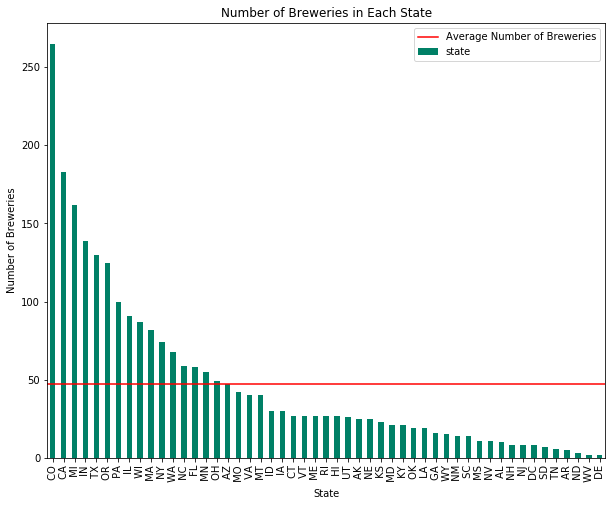

In [13]:
ax = df.state.value_counts().plot(kind='bar', title='Number of Breweries in Each State',figsize=(10,8), colormap='summer')
ax.set_xlabel('State')
ax.set_ylabel('Number of Breweries')
mean_line = ax.axhline(df.state.value_counts().mean(), color='r', label='Average Number of Breweries')
plt.legend()

Text(0,0.5,'Number of Breweries')

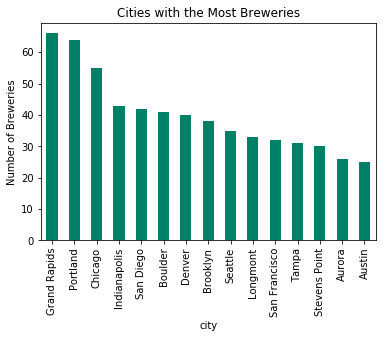

In [20]:
ax1 = df.groupby('city')['brewery_name'].count().nlargest(15).plot(kind='bar',title='Cities with the Most Breweries',colormap='summer')
ax1.set_ylabel('Number of Breweries')



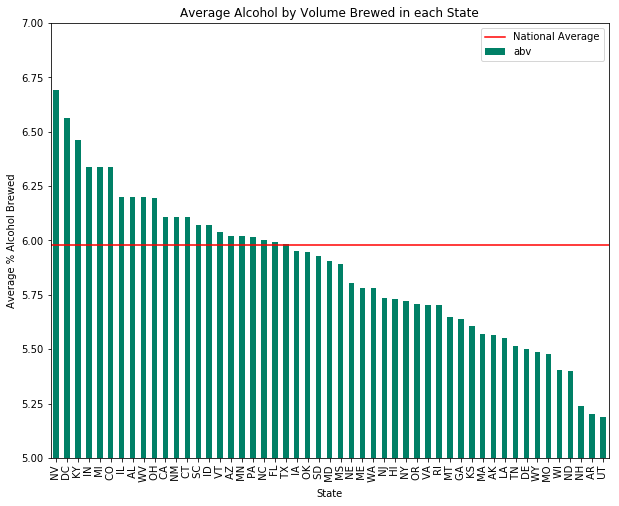

In [24]:
ax2 = df.groupby('state')['abv'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Alcohol by Volume Brewed in each State',figsize=(10,8),ylim=(5,7), colormap='summer')

ax2.set_xlabel('State')
ax2.set_ylabel('Average % Alcohol Brewed')
mean_line1 = ax2.axhline(df.abv.mean(), color='r',label='National Average')

plt.legend()





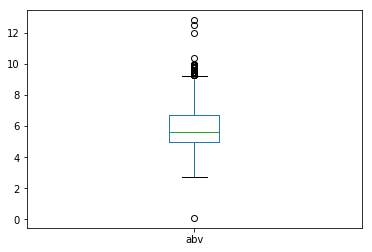

In [25]:
df.boxplot(column=['abv'], grid=False)

(array([  0.,   3.,  35., 422., 870., 516., 251., 142., 103.,   2.,   1.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 11 Patch objects>)

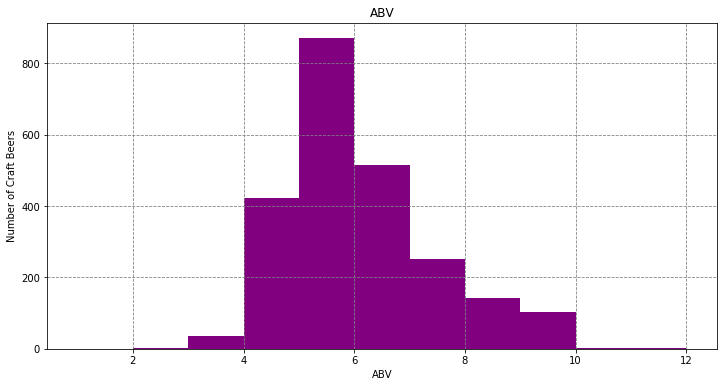

In [27]:
plt.figure(figsize=(12,6))
plt.title('ABV')
plt.xlabel('ABV')
plt.ylabel('Number of Craft Beers')
plt.grid(color='gray', linestyle='dashed')

plt.hist(df['abv'], bins=np.arange(1,13,1), color='purple')

(array([  3.,  37.,  70., 146., 188., 116., 102.,  97.,  88.,  67.,  44.,
         37.,  64.,  85.,  66.,  39.,  30.,  40.,  25.,  12.,  29.,   2.,
          5.,   6.,   3.,   1.,   2.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135]),
 <a list of 27 Patch objects>)

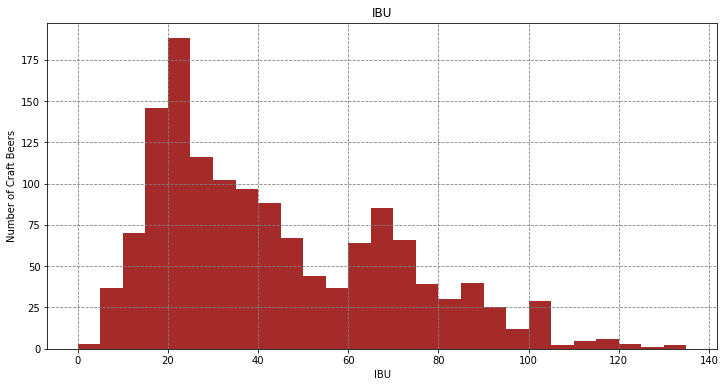

In [28]:
plt.figure(figsize=(12,6))
plt.title('IBU')
plt.xlabel('IBU')
plt.ylabel('Number of Craft Beers')
plt.grid(color='gray', linestyle='dashed')

plt.hist(df['ibu'], bins=np.arange(0,138,5), color='brown')

## Style

In [37]:
df['style'].value_counts().head(10)

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: style, dtype: int64

Text(0,0.5,'Number of Different Beers')

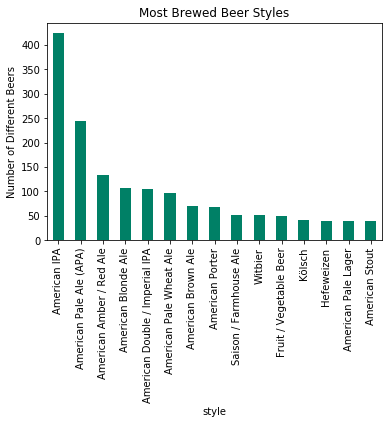

In [39]:
ax4 = df.groupby('style')['beer_name'].count().nlargest(15).plot(kind='bar',title='Most Brewed Beer Styles',colormap='summer')
ax4.set_ylabel('Number of Different Beers')
                          

Text(0,0.5,'Average % Alcohol Brewed')

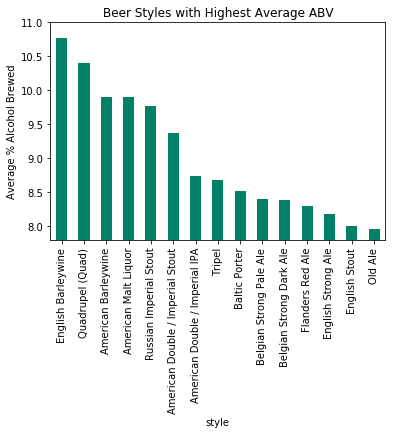

In [30]:
ax3 = df.groupby('style')['abv'].mean().nlargest(15).plot(kind='bar', title='Beer Styles with Highest Average ABV',colormap='summer', ylim=(7.8,11))

ax3.set_ylabel('Average % Alcohol Brewed')

## IBU

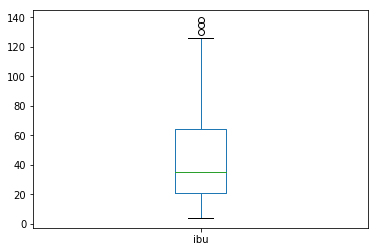

In [47]:
df.boxplot(column=['ibu'], grid=False)

In [41]:
df_corr_col = df[['abv','ibu','ounces']].copy()
df_corr_col.head()

,abv,ibu,ounces
0,5.0,NaN,12.0
1,6.6,NaN,12.0
2,7.1,NaN,12.0
3,9.0,NaN,12.0
4,7.5,NaN,12.0


In [42]:
df_corr_col.corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


Text(0,0.5,'abv')

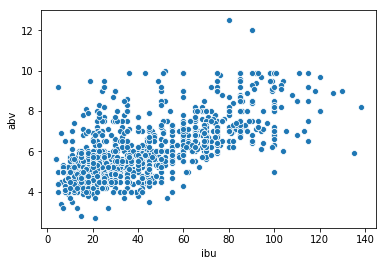

In [45]:
sns.scatterplot(x='ibu', y='abv', data=df)
plt.xlabel('ibu')
plt.ylabel('abv')

Text(0.5,1,'Craft Beers -- Bitterness vs Alcohol Content ')

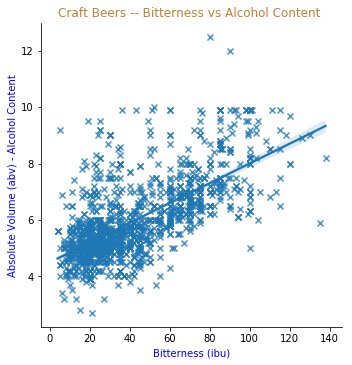

In [46]:
beertemp = df
beertemp.dropna(inplace=True)
sns.lmplot("ibu","abv", data=beertemp,markers="x")
plt.xlabel("Bitterness (ibu)",color='blue')
plt.ylabel("Absolute Volume (abv) - Alcohol Content",color='blue')
plt.title("Craft Beers -- Bitterness vs Alcohol Content ", color='#BE823A')